# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a Kaggle competition on classifying dog breeds.

https://www.kaggle.com/c/dog-breed-identification

## Objectives

You will be able to:
* Independently design and build a CNN for image classifcation tasks
* Compare and apply multiple techniques for tuning a model including data augmentation and adapting pretrained models

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarned that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found here:

https://www.kaggle.com/c/dog-breed-identification/data

It's easiest if you download the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders. If you download the data elsewhere, be sure to modify the file path when importing the file below.

In [1]:
# No code persay, but download and decompress the data.

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that you've been given to date. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall that you'll also want to use one-hot encoding as you are now presented with a multi-class problem as opposed to simple binary classification.

In [5]:
# Your code here; open the labels.csv file stored in the zip file
import pandas as pd

df = pd.read_csv('dog-breed-identification/labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


We wish to create our standard directory structure:
* train
    * category1
    * category2
    * category3
    ...
* val
    * category1
    * category2
    * category3
    ...
* test 
    * category1
    * category2
    * category3
    ...  

In [8]:
print('Number of unique breeds: ', df.breed.nunique())
print(df.breed.value_counts()[:10])

Number of unique breeds:  120
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
pomeranian              111
great_pyrenees          111
basenji                 110
samoyed                 109
Name: breed, dtype: int64


In [17]:
import numpy as np
import os, shutil

old_dir = 'dog-breed-identification/train/'

new_root_dir = 'data_org/'
os.mkdir(new_root_dir)

dir_names = ['train','val','test']
for d in dir_names:
    new_dir = os.path.join(new_root_dir,d)
    os.mkdir(new_dir)

for breed in df.breed.unique():
    print('Moving {} pictures.'.format(breed))
    for d in dir_names:
        new_dir = os.path.join(new_root_dir,d,breed)
        os.mkdir(new_dir)
    temp = df[df.breed == breed]
    train,val,test = np.split(temp.sample(frac=1),[int(.8*len(temp)), int(.9*len(temp))])
    print(f'Split {len(temp)} images into {len(train)} train, {len(val)} val,{len(test)} test examples.')
    
    for i, temp in enumerate([train, val, test]):
        for row in temp.index:
            filename = temp['id'][row]+'.jpg'
            origin = os.path.join(old_dir+filename)
            destination = os.path.join(new_root_dir+dir_names[i]+'/'+breed+'/'+filename)
            shutil.copy(origin,destination)

Moving boston_bull pictures.
Split 87 images into 69 train, 9 val,9 test examples.
Moving dingo pictures.
Split 80 images into 64 train, 8 val,8 test examples.
Moving pekinese pictures.
Split 75 images into 60 train, 7 val,8 test examples.
Moving bluetick pictures.
Split 85 images into 68 train, 8 val,9 test examples.
Moving golden_retriever pictures.
Split 67 images into 53 train, 7 val,7 test examples.
Moving bedlington_terrier pictures.
Split 89 images into 71 train, 9 val,9 test examples.
Moving borzoi pictures.
Split 75 images into 60 train, 7 val,8 test examples.
Moving basenji pictures.
Split 110 images into 88 train, 11 val,11 test examples.
Moving scottish_deerhound pictures.
Split 126 images into 100 train, 13 val,13 test examples.
Moving shetland_sheepdog pictures.
Split 76 images into 60 train, 8 val,8 test examples.
Moving walker_hound pictures.
Split 69 images into 55 train, 7 val,7 test examples.
Moving maltese_dog pictures.
Split 117 images into 93 train, 12 val,12 test

Moving kerry_blue_terrier pictures.
Split 82 images into 65 train, 8 val,9 test examples.
Moving whippet pictures.
Split 95 images into 76 train, 9 val,10 test examples.
Moving sealyham_terrier pictures.
Split 88 images into 70 train, 9 val,9 test examples.
Moving standard_poodle pictures.
Split 79 images into 63 train, 8 val,8 test examples.
Moving keeshond pictures.
Split 81 images into 64 train, 8 val,9 test examples.
Moving japanese_spaniel pictures.
Split 105 images into 84 train, 10 val,11 test examples.
Moving miniature_poodle pictures.
Split 79 images into 63 train, 8 val,8 test examples.
Moving pomeranian pictures.
Split 111 images into 88 train, 11 val,12 test examples.
Moving curly-coated_retriever pictures.
Split 72 images into 57 train, 7 val,8 test examples.
Moving yorkshire_terrier pictures.
Split 82 images into 65 train, 8 val,9 test examples.
Moving pembroke pictures.
Split 92 images into 73 train, 9 val,10 test examples.
Moving great_dane pictures.
Split 75 images int

In [19]:
# Your code here; transform the image files and then load them into Keras as tensors 
# (be sure to perform a train-val-test split)
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'data_org/train/'
val_dir = 'data_org/val/'
test_dir = 'data_org/test/'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='categorical')

val_generator = test_datagen.flow_from_directory(val_dir,
                                                target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='categorical')

Found 8127 images belonging to 120 classes.
Found 1017 images belonging to 120 classes.


In [20]:
train_generator.class_indices

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [21]:
# Create a baseline CNN model
import datetime
original_start = datetime.datetime.now()
start = datetime.datetime.now()

In [25]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(120, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100,epochs=30,
                             validation_data = val_generator, validation_steps=50)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 64s 636ms/step - loss: 4.7859 - acc: 0.0095 - val_loss: 4.7845 - val_acc: 0.0080
Epoch 2/30
100/100 [==============================] - 60s 599ms/step - loss: 4.7868 - acc: 0.0140 - val_loss: 4.7817 - val_acc: 0.0130
Epoch 3/30
100/100 [==============================] - 59s 594ms/step - loss: 4.7847 - acc: 0.0170 - val_loss: 4.7802 - val_acc: 0.0130
Epoch 4/30
100/100 [==============================] - 61s 610ms/step - loss: 4.7865 - acc: 0.0065 - val_loss: 4.7806 - val_acc: 0.0120
Epoch 5/30
100/100 [==============================] - 63s 625ms/step - loss: 4.7751 - acc: 0.0110 - val_loss: 4.7614 - val_acc: 0.0110
Epoch 6/30
100/100 [==============================] - 62s 619ms/step - loss: 4.7477 - acc: 0.0145 - val_loss: 4.7278 - val_acc: 0.0201
Epoch 7/30
100/100 [==============================] - 62s 623ms/step -

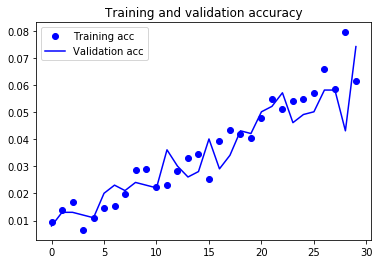

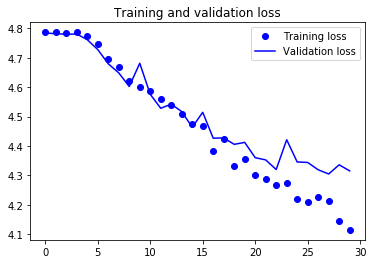

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 0:36:12.037720


In [28]:
model.save('Baseline_CNN_run2.h5')

In [29]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

Found 1078 images belonging to 120 classes.
Generated 1078 predictions
test acc: 0.05194805271522676


In [30]:
import numpy as np
y_hat_test_vect = np.argmax(y_hat_test, axis=1)
print(y_hat_test_vect.shape)
y_hat_test_vect[:5]

(1078,)


array([54, 78,  0, 20, 92])

In [31]:
y_true = test_generator.classes
print(y_true.shape)
y_true[:5]

(1078,)


array([0, 0, 0, 0, 0], dtype=int32)

In [32]:
matches = 0
for act, pred in list(zip(y_true, y_hat_test_vect)):
    if act == pred:
        matches += 1
    else:
        continue
acc = matches / len(y_true)
print('{} matches for {}% accuracy.'.format(matches, round(acc*100, 2)))

56 matches for 5.19% accuracy.


## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

Now that you've loaded a pretrained model, it's time to adapt that convolutional base and add some fully connected layers on top in order to build a classifier from these feature maps.

In [33]:
# Your code here; add fully connected layers on top of the convolutional base
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(240, 240, 3))

#Define Model Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(120, activation='sigmoid'))

cnn_base.trainable = False

#You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute:
for layer in model.layers:
    print(layer.name, layer.trainable)
    
#Similarly, we can check how many trainable weights are in the model:
print(len(model.trainable_weights))
model.summary()

vgg19 False
flatten_2 True
dense_6 True
dense_7 True
dense_8 True
dense_9 True
dense_10 True
10
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
________________________

In [34]:
# Preprocessing/Problem Setup
train_dir = 'data_org/train'
validation_dir = 'data_org/val/'
test_dir = 'data_org/test/'


# Define Initial Parameters (same as previous code block)
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

# get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(240, 240), 
        batch_size= 20,
        class_mode= 'categorical') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validation_dir, 
        target_size=(240, 240), 
        batch_size = 20,
        class_mode= 'categorical')

# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, 
        target_size=(240, 240), 
        batch_size = 180,
        class_mode= 'categorical',
        shuffle=False)

test_images, test_labels = next(test_generator)


# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# Fitting the Model
history = model.fit_generator(
              train_generator,
              steps_per_epoch= 27,
              epochs = 10,
              validation_data = val_generator,
              validation_steps = 10)


Found 8127 images belonging to 120 classes.
Found 1017 images belonging to 120 classes.
Found 1078 images belonging to 120 classes.
Epoch 1/10
27/27 [==============================] - 312s 12s/step - loss: 4.7873 - acc: 0.0019 - val_loss: 4.7885 - val_acc: 0.0100
Epoch 2/10
27/27 [==============================] - 306s 11s/step - loss: 4.7897 - acc: 0.0074 - val_loss: 4.7888 - val_acc: 0.0050
Epoch 3/10
27/27 [==============================] - 306s 11s/step - loss: 4.7896 - acc: 0.0093 - val_loss: 4.7885 - val_acc: 0.0000e+00
Epoch 4/10
27/27 [==============================] - 302s 11s/step - loss: 4.7886 - acc: 0.0074 - val_loss: 4.7853 - val_acc: 0.0100
Epoch 5/10
27/27 [==============================] - 301s 11s/step - loss: 4.7858 - acc: 0.0093 - val_loss: 4.7932 - val_acc: 0.0200
Epoch 6/10
27/27 [==============================] - 297s 11s/step - loss: 4.7899 - acc: 0.0074 - val_loss: 4.7831 - val_acc: 0.0102
Epoch 7/10
27/27 [==============================] - 295s 11s/step - loss

In [35]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 1:31:24.174460


## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

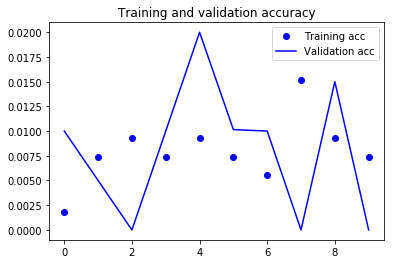

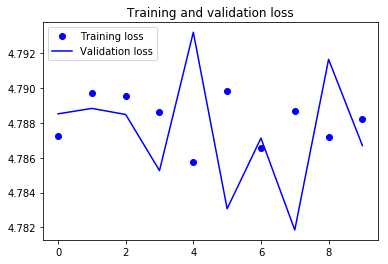

In [36]:
# Your code here; visualize the training / validation history associated with fitting the model.
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
# Save model
model.save('vgg19_FE_AUG_10epochs.h5')

In [38]:
import pickle

with open('history_vgg19_10epochs.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(history, f, pickle.HIGHEST_PROTOCOL)

## Final Model Evaluation

In [39]:
# Your code here
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(240, 240),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

Found 1078 images belonging to 120 classes.
Generated 1078 predictions
test acc: 0.006493506521152432


## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.